In [31]:
# Import our dependencies
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import numpy as np

In [32]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from pathlib import Path

In [33]:
bb_players = "combined_ncaa_player_stats.csv"
df = pd.read_csv(bb_players)
df

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6-4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6-6,1.3,5.1,3.51,2.8,0


In [34]:
#drop url column
df = df.drop(columns=['url'])

In [35]:
df.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0


In [36]:
#convert height change nan to zero
df["height"]= df["height"].fillna('0-0')

In [37]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))
print (df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109656     0.0
109657     0.0
109658    76.0
109659    78.0
109660    80.0
Name: height, Length: 109661, dtype: float64


In [38]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [39]:
#replace nan with 0
df= df.fillna(0)

In [40]:
df.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [41]:
#split data set in half to use first half to train model and second half to test our prediction 
train = df.iloc[:54831]
test = df.iloc[54831:]

In [42]:
train.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [43]:
test.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0


In [44]:
#assign data to X and Y
#using the features against the is_pro model

X =train[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = train['is_pro'].astype(int)

In [45]:
print("Shape: ", X.shape, y.shape)

Shape:  (54831, 12) (54831,)


In [46]:
#split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

<b>Random Forest<b>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

Feature: 0, Score: 0.06535
Feature: 1, Score: 0.07521
Feature: 2, Score: 0.07547
Feature: 3, Score: 0.06134
Feature: 4, Score: 0.05889
Feature: 5, Score: 0.06657
Feature: 6, Score: 0.08829
Feature: 7, Score: 0.06612
Feature: 8, Score: 0.05233
Feature: 9, Score: 0.10755
Feature: 10, Score: 0.21285
Feature: 11, Score: 0.07003


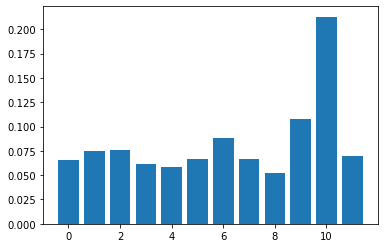

In [48]:
# define dataset
# Feautures and Predicted
X =train[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = train['is_pro'].astype(int)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [49]:
# train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<b>Shap<b>

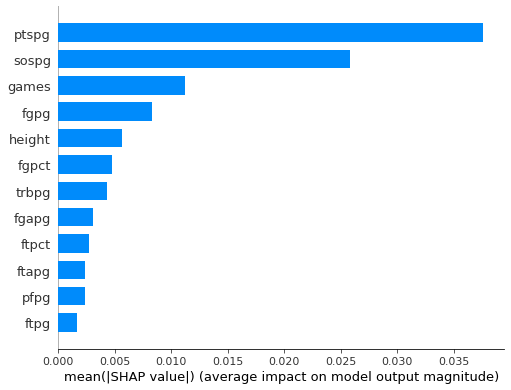

In [53]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [50]:
from sklearn.metrics import accuracy_score
# make predictions
outcome = model.predict(X)
# evaluate predictions
acc = accuracy_score(y, outcome)
print(acc)

0.9999452864255621


<b>Scaled Data<b> 

In [51]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9999513654159473
Testing Score: 0.9736650131310184


In [20]:
test.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
54831,_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
54832,Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
54833,Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
54834,Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
54835,Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0


In [21]:
known_outcomes = test.set_index('name')
known_outcomes

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
name,,,,,,,,,,,,,
_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0,0
Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4,0
Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0,0
Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7,0
Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,0.0,0.0,3.1,-4.16,0.0,0
Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,0.0,1.7,7.0,-12.74,2.0,0
Michal Zylinski,1.5,0.333,0.5,0.0,0.000,0.0,2.0,76.0,0.5,1.5,-6.49,0.5,0


In [22]:
prediction = test.set_index('name')
prediction = prediction.drop(columns=['is_pro'])

In [23]:
prediction.head()

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg
name,,,,,,,,,,,,
_ Knurek,0.0,0.000,1.0,0.7,0.429,0.3,21.0,0.0,1.2,2.4,0.00,0.0
Danny Knust,5.3,0.434,2.3,2.4,0.660,1.6,20.0,0.0,2.0,6.2,0.00,2.4
Jay Knuth,2.0,0.365,0.7,1.1,0.882,0.9,32.0,78.0,1.0,2.7,0.46,1.0
Tom Knuth,2.0,0.432,0.9,1.2,0.704,0.9,44.0,76.0,1.4,2.6,-8.06,1.7
Gabe Knutson,8.2,0.511,4.2,4.5,0.751,3.4,128.0,81.0,2.2,11.9,-5.41,5.3


<b>Prediction 1 known undrafted player<b>
Outcome as expected [0]

In [24]:
#Gabe Knutson
undrafted_knutson = known_outcomes.loc['Gabe Knutson',:]
Gabe_Knutson = prediction.loc['Gabe Knutson',:]

print(Gabe_Knutson)
print(undrafted_knutson)

fgapg       8.200
fgpct       0.511
fgpg        4.200
ftapg       4.500
ftpct       0.751
ftpg        3.400
games     128.000
height     81.000
pfpg        2.200
ptspg      11.900
sospg      -5.410
trbpg       5.300
Name: Gabe Knutson, dtype: float64
fgapg       8.200
fgpct       0.511
fgpg        4.200
ftapg       4.500
ftpct       0.751
ftpg        3.400
games     128.000
height     81.000
pfpg        2.200
ptspg      11.900
sospg      -5.410
trbpg       5.300
is_pro      0.000
Name: Gabe Knutson, dtype: float64


In [25]:
# define input for known undrafted player Gabe Knutson
new_input =[Gabe_Knutson]

In [26]:
# get prediction for new input
new_output = model.predict(new_input)

In [27]:
# summarize input and output
print(new_input, new_output)

[fgapg       8.200
fgpct       0.511
fgpg        4.200
ftapg       4.500
ftpct       0.751
ftpg        3.400
games     128.000
height     81.000
pfpg        2.200
ptspg      11.900
sospg      -5.410
trbpg       5.300
Name: Gabe Knutson, dtype: float64] [0]


<b>Prediction 2 known drafted playeer Outcome as expected [1]

In [28]:
#now let's try a known drafted player Tyler Zeller
drafted_Zeller = known_outcomes.loc['Tyler Zeller',:]
Tyler_Zeller = prediction.loc['Tyler Zeller',:]

print(Tyler_Zeller)
print(drafted_Zeller)


fgapg       8.600
fgpct       0.543
fgpg        4.700
ftapg       4.500
ftpct       0.775
ftpg        3.500
games     117.000
height     84.000
pfpg        2.300
ptspg      12.800
sospg       8.850
trbpg       6.700
Name: Tyler Zeller, dtype: float64
fgapg       8.600
fgpct       0.543
fgpg        4.700
ftapg       4.500
ftpct       0.775
ftpg        3.500
games     117.000
height     84.000
pfpg        2.300
ptspg      12.800
sospg       8.850
trbpg       6.700
is_pro      1.000
Name: Tyler Zeller, dtype: float64


In [29]:
#define input for known drafted player Tyler_Zeller
new_input2 =[Tyler_Zeller]

In [30]:
# get prediction for new input 2
new_output2 = model.predict(new_input2)

# summarize input and output
print(new_input2, new_output2)

[fgapg       8.600
fgpct       0.543
fgpg        4.700
ftapg       4.500
ftpct       0.775
ftpg        3.500
games     117.000
height     84.000
pfpg        2.300
ptspg      12.800
sospg       8.850
trbpg       6.700
Name: Tyler Zeller, dtype: float64] [1]


<b>Prediction 3 known drafter player Outcome as expected [1]

In [54]:
#now let's try a known drafted player Stephen Zimmerman
drafted_Zimmerman = known_outcomes.loc['Stephen Zimmerman',:]
Stephen_Zimmerman = prediction.loc['Stephen Zimmerman',:]

print(Stephen_Zimmerman)
print(drafted_Zimmerman)

fgapg      8.200
fgpct      0.477
fgpg       3.900
ftapg      3.900
ftpct      0.624
ftpg       2.400
games     26.000
height    84.000
pfpg       3.000
ptspg     10.500
sospg      3.170
trbpg      8.700
Name: Stephen Zimmerman, dtype: float64
fgapg      8.200
fgpct      0.477
fgpg       3.900
ftapg      3.900
ftpct      0.624
ftpg       2.400
games     26.000
height    84.000
pfpg       3.000
ptspg     10.500
sospg      3.170
trbpg      8.700
is_pro     1.000
Name: Stephen Zimmerman, dtype: float64


In [56]:
#define input for known drafted player Stephen_Zimmerman
new_input3 =[Stephen_Zimmerman]

# get prediction for new input 2
new_output3 = model.predict(new_input3)

# summarize input and output
print(new_input3, new_output2)

[fgapg      8.200
fgpct      0.477
fgpg       3.900
ftapg      3.900
ftpct      0.624
ftpg       2.400
games     26.000
height    84.000
pfpg       3.000
ptspg     10.500
sospg      3.170
trbpg      8.700
Name: Stephen Zimmerman, dtype: float64] [1]
